Below is presented two examples of classic mathematical programming problems. Both examples are implemented using [Julia](www.julialang.org) language.

# The Carpenter's problem

A carpenter wants to plan his production of tables and chair such that his income is maximised. Every table 
produced is sold for 1000\\$ and every chair produced is sold for 500\\$. 

To produce one table, the carpenter needs 3h of work and 7 units of wood. To produce one chair, the carpenter requires 5h of work and 4 units of wood. Weekly, the carpenter has 40h of labour available and 60 units of wood.

Formulate a mathematical program that maximises the carpenter's weekly outcome. 

## Solution

Let $x_t$ be total of tables produced weekly and $x_c$ the total of chairs produced weekly. The total income of the carpenter as a function of $x_t$ and $x_c$ is

$$ z = 800x_t + 600x_c
$$

The carpenter has raw material and labour availability constraints. These can be expressed as

$$\begin{align}
\text{(total hours of labour used) } &3x_t + 5x_c \leq 40 \text{ (total hours of labour available)}\\
\text{(total amount of wood used) } &4x_t + 7x_c \leq 60 \text{ (total amount of wood available)}\\
\end{align}
$$

The mathematical program that maximises the income of the carpenter is given by:

$$
\begin{align}
\text{maximise}_{x_t,x_c} \ &800x_t + 600x_c \\
\text{subject to: } &3x_t + 5x_c \leq 40\\
&4x_t + 7x_c \leq 60\\
&x_t, x_c \geq 0.
\end{align}
$$

In [2]:
using JuMP, Cbc

m = Model(with_optimizer(Cbc.Optimizer)) # Creates a model and informs the solver to be used.

@variable(m, x_t >= 0) # Variable for the total of tables
@variable(m, x_c >= 0) # Variables for the total of chairs

@objective(m, Max, 800*x_t + 600*x_c) # Income function

@constraint(m, 3*x_t + 5*x_c <= 40) # Labour constraint
@constraint(m, 7*x_t + 4*x_c <= 60) # Wood availability constraint

println(m) # Prints the mathematical model

Max 800 x_t + 600 x_c
Subject to
 3 x_t + 5 x_c ≤ 40.0
 7 x_t + 4 x_c ≤ 60.0
 x_t ≥ 0.0
 x_c ≥ 0.0



In [3]:
optimize!(m); # Solve the model

println("\n\nOptimal production plan",
        "\n-------------------------",
        "\nTotal of tables: ", round(value.(x_t), digits=2), 
        "\nTotal of chairs: ", round(value.(x_c), digits=2))



Optimal production plan
-------------------------
Total of tables: 6.09
Total of chairs: 4.35
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Oct  7 2019 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 1400 (2)
0  Obj -0 Dual inf 1400 (2)
2  Obj 7478.2609
Optimal - objective value 7478.2609
Optimal objective 7478.26087 - 2 iterations time 0.002
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



# The distribution planning problem

We have to plan the distribution of a given product. The objective is to minimise the transportation costs, while observing capacity limitations of the factories and that all clients have their demand  fully met.

The table below summarises the capacities, demands, and transportation costs between factories and clients.

|              |  Clients  |          |        |       |             
| ---------    | --------- | -------- | ------ | ----- |
| **Factory**  |New York   | Chicago  | Miami  | **Capacity**|
|Seattle       | 2.5       | 1.7      | 1.8    | 350   |
|San Diego     | 3.5       | 1.9      | 1.4    | 600   |
| **Demands**  | 325       | 300      | 275    | -     |

Formulate a mathematical program that minimises the distribution plan.


## Solution

Let $i \in I = \{\text{Seattle}, \text{San Diego}\}$ be the index representing factories (that is, $i=1$ refers to Seattle, $i=2$ refers to San Diego). Similarly, let $j \in J = \{\text{New York}, \text{Chicago}, \text{Miami}\}$.

Let $x_{ij}$ be the total amount produced in factory $i$ and sent to client $j$. 

The total distribution cost is given by

$$ 2.5x_{11} + 1.7x_{12} + 1.8x_{13} + 3.5x_{21} + 1.9x_{22} + 1.4x_{23},
$$

which can be more compactly expressed as 

$$\sum_{i \in I}\sum_{j \in J}x_{ij}.$$

The capacity limitation constraints must be enforced for each plant:

$$\begin{align}
\text{(total production from Seattle) } &x_{11} + x_{12} + x_{13} \leq 350 \text{ (total capacity in Seattle)}\\
\text{(total production from San Diego) } &x_{21} + x_{22} + x_{23} \leq 600 \text{ (total capacity in San Diego)}.
\end{align}
$$

These constraints can be expressed in the more compact form

$$ \sum_{j \in J} x_{ij} \leq C_i, \forall i,$$

where $C_i$ is the production capacity of factory $i$.

The demand fulfillment constraints must be enforced for each client:

$$\begin{align}
\text{(total of products in New York) } &x_{11} + x_{21} \geq 325 \text{ (total demand in New York)}\\
\text{(total of products in Chicago) } &x_{12} + x_{22} \geq 300 \text{ (total demand in Chicago)}\\
\text{(total of products in Miami) } &x_{13} + x_{23} \geq 275 \text{ (total demand in Miami)}.
\end{align}
$$

More compactly:

$$\sum_{i \in I} x_{ij} \geq D_j, \forall j,$$

where $D_j$ is the demand of client $j$.

The mathematical program that minimises the production and transportation costs is given by

$$
\begin{align}
\text{minimise}_{x_{11},\dots,x_{23}} \ &2.5x_{11} + 1.7x_{12} + 1.8x_{13} + 3.5x_{21} + 1.9x_{22} + 1.4x_{23} \\
\text{subject to: } &x_{11} + x_{12} + x_{13} \leq 350\\
&x_{21} + x_{22} + x_{23} \leq 600\\
&x_{11} + x_{21} \geq 325\\
&x_{12} + x_{22} \geq 300\\
&x_{13} + x_{23} \geq 275\\
&x_{11}, \dots, x_{23} \geq 0.
\end{align}
$$

Or, more compactly

$$
\begin{align}
\text{minimise}_{x_{ij}}\ &\sum_{i \in I}\sum_{j \in J}x_{ij}\\
\text{subject to: } & \sum_{j \in J} x_{ij} \leq C_i, \forall i\\
& \sum_{i \in I} x_{ij} \geq D_j, \forall j\\
&x_{ij} \geq 0, \forall i \in I, \forall j \in J.
\end{align}
$$



In [4]:
using JuMP, Cbc

# Problem data

i = 1:2           # i=1: Seattle; i=2: San Diego 
j = 1:3           # j=1: New York; j=2: Chicago; j=3: Miami 

C = [350 600]     # Capacities of the factories

D = [325 300 275] # Demand of clients

T = [2.5 1.7 1.8;
     3.5 1.9 1.4]; # Transportation costs

In [5]:
# Model implementation

m = Model(with_optimizer(Cbc.Optimizer)) # Creates a model and informs the solver to be used.

@variable(m, x[i,j] >= 0)                                     # Variable for the total transported

@objective(m, Min, sum(T[i,j]*x[i,j] for i=1:2, j=1:3))       # Distribution cost

@constraint(m, cap[i = 1:2], sum(x[i,j] for j = 1:3) <= C[i]) # Capacity constraint
@constraint(m, dem[j = 1:3], sum(x[i,j] for i = 1:2) >= D[j]) # Demand constraint

println(m)                                                    # Prints the mathematical model

Min 2.5 x[1,1] + 1.7 x[1,2] + 1.8 x[1,3] + 3.5 x[2,1] + 1.9 x[2,2] + 1.4 x[2,3]
Subject to
 x[1,1] + x[2,1] ≥ 325.0
 x[1,2] + x[2,2] ≥ 300.0
 x[1,3] + x[2,3] ≥ 275.0
 x[1,1] + x[1,2] + x[1,3] ≤ 350.0
 x[2,1] + x[2,2] + x[2,3] ≤ 600.0
 x[1,1] ≥ 0.0
 x[1,2] ≥ 0.0
 x[1,3] ≥ 0.0
 x[2,1] ≥ 0.0
 x[2,2] ≥ 0.0
 x[2,3] ≥ 0.0



In [7]:
optimize!(m) # Solve the model
println("\nDistribution plan: \n", value.(x))


Distribution plan: 
2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, 1:2
    Dimension 2, 1:3
And data, a 2×3 Array{Float64,2}:
 325.0   25.0    0.0
   0.0  275.0  275.0
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Oct  7 2019 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Presolve 5 (0) rows, 6 (0) columns and 12 (0) elements
Optimal - objective value 1762.5
Optimal objective 1762.5 - 0 iterations time 0.002
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



Let's what happens for large (more realistic) problems. The code below implements the same model as before, but using arbitrary numbers of client and factories, set as $M$ and $N$, respectively. 

To calculate the costs, we use the Euclidean distance between points that have their coordinates randomly generated. We randomly generate $M+N$ points, assuming that the first $M$ are clients and the last $N$ are factories. 

In [8]:
using Random
M = 50 # factories
N = 100 # clients
 
x_coord = 1000*rand(M+N)
y_coord = 1000*rand(M+N)

C = 30*rand(M) # factory capacity
D = 10*rand(N) # client demand

T = zeros(M,N) # cost 

# Calculate the (Euclidean) distance between nodes based on their coordinates
for i = 1:M
    for j = 1:N
        T[i,j] = 10*sqrt((x_coord[i] - x_coord[j+M])^2 + 
            (y_coord[i] - y_coord[j+M])^2)
    end
end

# In case the random capacities add to be less than the demand, we add the difference to the last node.
if sum(C) < sum(D)
    println("Capacity has been adjusted to obtain feasibility.\n")
    C[N] = C[N] + sum(D) - sum(C)
end

In [9]:
m = Model(with_optimizer(Cbc.Optimizer)) # Creates a model and informs the solver to be used.

@variable(m, x[i = 1:M, j = 1:N] >= 0) # Variable for the total transported

@objective(m, Min, sum(T[i,j]*x[i,j] for i = 1:M, j = 1:N)) # Distribution cost

@constraint(m, cap[i = 1:M], sum(x[i,j] for j = 1:N) <= C[i]) # Capacity constraint
@constraint(m, dem[j = 1:N], sum(x[i,j] for i = 1:M) >= D[j]); # Demand constraint

println(m) # Prints the mathematical model (at your own risk!)

Min 6186.736861801301 x[1,1] + 10652.422157906767 x[1,2] + 8011.971404760259 x[1,3] + 5263.153972952182 x[1,4] + 4998.834037971331 x[1,5] + 7340.690172276361 x[1,6] + 1466.0644934415634 x[1,7] + 913.4180217382977 x[1,8] + 3163.5549762627743 x[1,9] + 658.9496776458474 x[1,10] + 7659.071726447928 x[1,11] + 4184.632110648244 x[1,12] + 2382.8707741931166 x[1,13] + 8426.459151318615 x[1,14] + 9283.309762743478 x[1,15] + 3861.8740312611526 x[1,16] + 7769.436753534386 x[1,17] + 1883.067412347119 x[1,18] + 4731.679333407309 x[1,19] + 2958.785897067544 x[1,20] + 2241.67170699663 x[1,21] + 9477.824360462204 x[1,22] + 1793.4363693276146 x[1,23] + 10707.205883500326 x[1,24] + 8679.96242722237 x[1,25] + 5171.175034470248 x[1,26] + 2257.0310828241963 x[1,27] + 6330.9131455720535 x[1,28] + 6708.609417903962 x[1,29] + 5304.441555390631 x[1,30] + 5411.686766594826 x[1,31] + 597.1960486958749 x[1,32] + 3972.015164915158 x[1,33] + 7445.0132517463235 x[1,34] + 5999.3620932185195 x[1,35] + 2169.79105206338

In [10]:
optimize!(m) # Solve the model

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Oct  7 2019 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Presolve 150 (0) rows, 5000 (0) columns and 10000 (0) elements
0  Obj 0 Primal inf 562.37201 (100)
78  Obj 389439.88 Primal inf 140.755 (46)
145  Obj 478998.82
Optimal - objective value 478998.82
Optimal objective 478998.8236 - 145 iterations time 0.012
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



The code below plots a graph for the instance that was randomly generated.

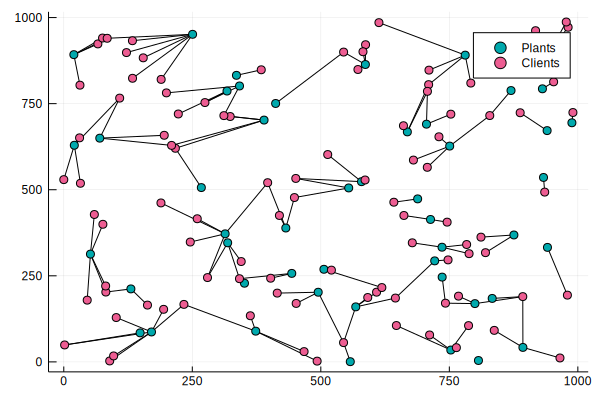

In [11]:
# This code plots a graph with the randomly generated instance and its solution.
using Plots

plot()

for i=1:M
    for j=1:N
        if value(x[i,j]) > 0.0
            plot!([x_coord[i],x_coord[j+M]],[y_coord[i], y_coord[j+M]], color=:black, label="")
        end
    end
end

scatter!(x_coord[1:M], y_coord[1:M], label = "Plants")
scatter!(x_coord[M+1:M+N], y_coord[M+1:M+N], label = "Clients", legend=true)